In [1]:
# Standard Packages
from torch.utils.data import random_split, DataLoader
import torch
from datetime import datetime
from matplotlib import pyplot as plt
# Custom Packages
from NeuralNetworkModels.SimpleFeedForward import DirectFeedForwardNet
from AntennaDatasets import AntennaDatasetLoaders

# General Settings
torch.manual_seed(42) # Manual seed for sanity
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [28]:
CUTS_IN_DATASET = 20

dataset = AntennaDatasetLoaders.ReflectorCutDataset(cuts = CUTS_IN_DATASET,flatten_output = True)

(4, 20)


In [47]:
TEST_TRAIN_RATIO = 0.7
BATCH_SIZE = 1
train_len = int(len(dataset)*TEST_TRAIN_RATIO)
train_set, test_set = random_split(dataset, [train_len, len(dataset) - train_len])

train_dataloader = DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size = BATCH_SIZE, shuffle=True)

In [48]:

#Define model
model = DirectFeedForwardNet(in_features = 3,out_features = 4004,NN = 100)
#Test Forward pass
print(model(torch.randn(2,3).to(device)))

tensor([[ 0.1102, -0.1614, -0.2065,  ...,  0.1476,  0.0598,  0.0337],
        [ 0.1768, -0.0837,  0.0250,  ...,  0.0824, -0.0510,  0.0138]],
       grad_fn=<AddmmBackward>)


In [58]:
LEARNING_RATE = 4e-2

criterion = torch.nn.MSELoss()

In [59]:
EPOCHS = int(200)

optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

startTime = datetime.now()
train_loss_array = []
test_loss_array = []
loss_array = []

for epoch in range(EPOCHS):

    epoch_training_loss = 0
    epoch_training_targets = 0
    train_batches = 0
    for input_train_batch, target_train_batch in train_dataloader:
        
        ## Transfer Batch to Device
        input_train_batch = input_train_batch.to(device)
        target_train_batch = target_train_batch.to(device)
        
        prediction = model(input_train_batch)
        
        loss = criterion(input = prediction, target = target_train_batch)
        epoch_training_loss += loss/(target_train_batch.shape[0]*target_train_batch.shape[1])
        train_batches +=1
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    
    epoch_test_loss = 0
    epoch_test_targets = 0
    test_batches=0
    with torch.no_grad():
        
        for input_test_batch, target_test_batch in test_dataloader:
            
            # Put thing to device
            input_test_batch = input_test_batch.to(device)
            target_test_batch = target_test_batch.to(device)
            
            
            prediction = model(input_train_batch)
            loss = criterion(input = prediction, target = target_test_batch)
            epoch_test_loss += loss/(target_test_batch.shape[0]*target_test_batch.shape[1])
            test_batches += 1
    
    if epoch%(EPOCHS/10) == 0:
        print('Training Loss',(epoch_training_loss/train_batches).item())
        print('Test Loss',(epoch_test_loss/test_batches).item())



print('Training time:', datetime.now()-startTime)

Training Loss 0.005366393364965916
Test Loss 0.005342715885490179
Training Loss 0.005356003064662218
Test Loss 0.00534076290205121
Training Loss 0.005355412606149912
Test Loss 0.005341805517673492
Training Loss 0.0053598009981215
Test Loss 0.005340259522199631
Training Loss 0.0053568677976727486
Test Loss 0.005340361502021551
Training Loss 0.005355886183679104
Test Loss 0.005341093987226486
Training Loss 0.005357544403523207
Test Loss 0.005342054646462202
Training Loss 0.005356170702725649
Test Loss 0.005340444389730692
Training Loss 0.005356398411095142
Test Loss 0.005340887233614922
Training Loss 0.00535658048465848
Test Loss 0.005341962445527315
Training time: 0:00:15.714435


tensor([[0.0179, 0.8444, 0.0000]])


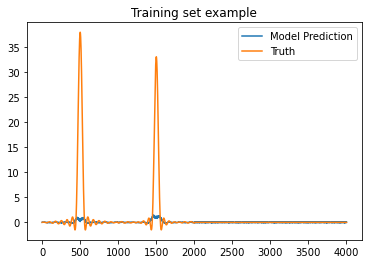

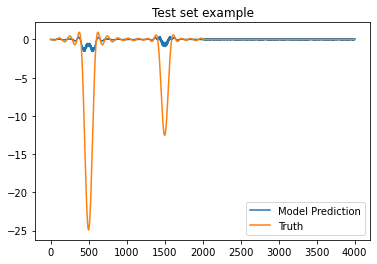

In [50]:
inp, tar = next(iter(train_dataloader)) 
print(inp)
plt.figure()
plt.title('Training set example')
plt.plot(model(inp).flatten().detach(),label = 'Model Prediction')
plt.plot(tar.flatten(),label ='Truth')
plt.legend()

inp, tar = next(iter(test_dataloader)) 
plt.figure()
plt.title('Test set example')
plt.plot(model(inp).flatten().detach(),label = 'Model Prediction')
plt.plot(tar.flatten(),label = 'Truth')
plt.legend()

Loss 15.391279220581055
Loss 14.888325691223145
Loss 3.9582700729370117
Loss 0.008918371982872486
Loss 1.7854410543804988e-05
Loss 3.5790336028185266e-08
Loss 2.4906976481275933e-10
Loss 6.686366738062333e-11
Loss 3.7077733244794686e-11
Loss 2.578907400130337e-11


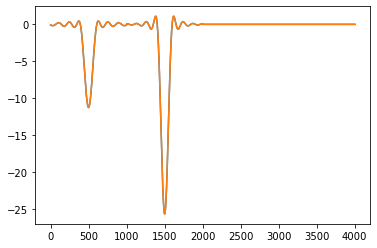

In [32]:
## Test overfitting
EPOCHS = int(2e3)

overFitModel = DirectFeedForwardNet(in_features = 3,out_features = 4004,NN = 100)
optimizer = torch.optim.SGD(overFitModel.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
inp, tar = next(iter(train_dataloader)) 
for epoch in range(EPOCHS):
    prediction = overFitModel(inp)
        
    loss = criterion(input = prediction, target = tar)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%(EPOCHS/10) == 0:
        print('Loss', loss.item())
    
    
plt.plot(overFitModel(inp).flatten().detach())
plt.plot(tar.flatten())

In [ ]:
inputs, classes = next(iter(train_dataloader)) 
print(inputs,classes)